REFERENCE
- Textbook: “Numerical Methods for Engineers, 8th edition” Steven C. Chapra and Raymond P. Canale, ISBN:1260232077, Copyright year:2021, McGraw-Hill.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_rows", None)

### Problem 30.8

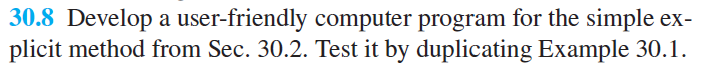

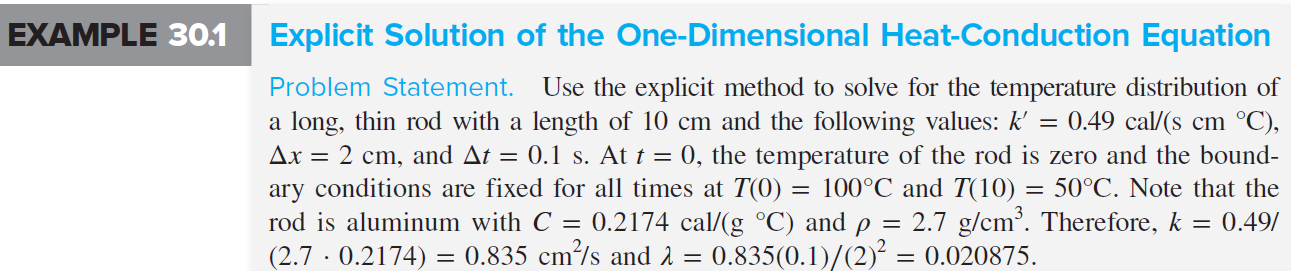

### Answer

1. Define Functions

In [2]:
# reference: section 30.2 from the textbook
def explicit_method():
    """
    This function implements the explicit method for the one-dimensional heat-conduction equation.
    """
    # get the number of intervals for x
    x_delta = 2
    x_max = 10
    x_cnt = int(x_max / x_delta)
    # get the number of intervals for t
    t_delta = 0.1
    t_max = 12
    t_cnt = int(t_max / t_delta)
    # get other parameters needed
    _lambda = 0.020875
    T_x_min, T_x_max = 100, 50 # boundary conditions
    T_t_0 = 0

    # initialize the matrix of T with value 0, T[t][x]
    T = [[0 for i in range(x_cnt + 1)] for j in range(t_cnt + 1)] # note: do not use * (same reference)
    # set the boundary values
    for row in T:
        row[0] = T_x_min # T(0) = 100
        row[x_cnt] = T_x_max # T(10) = 50
        
    # calculate the values of time (t+1) based on the values of time (t)
    # NOTE: explicit, only based on values in previous time
    for t in range(1, t_cnt + 1):
        for x in range(1, x_cnt):
            T[t][x] = round(T[t-1][x] + _lambda * (T[t-1][x+1] - 2 * T[t-1][x] + T[t-1][x-1]), 4)


    return T

2. Problem Solving

In [4]:
result1 = explicit_method()
# show the first five results
result1[:5]

[[100, 0, 0, 0, 0, 50],
 [100, 2.0875, 0.0, 0.0, 1.0437, 50],
 [100, 4.0878, 0.0436, 0.0218, 2.0439, 50],
 [100, 6.0055, 0.1276, 0.0645, 3.0028, 50],
 [100, 7.8449, 0.249, 0.1272, 3.9225, 50]]

In [5]:
# the above results are the same as example 30.1

3. Plot

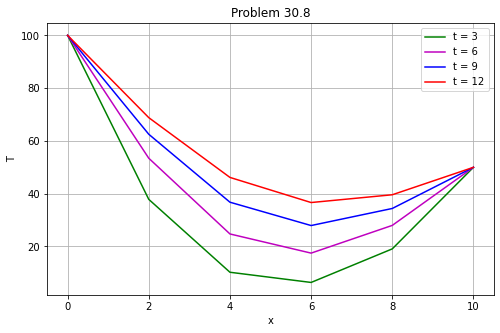

In [6]:
x = np.linspace(0, 10, 6)
t_3 = result1[30]
t_6 = result1[60]
t_9 = result1[90]
t_12 = result1[120]

plt.figure(figsize = (8, 5))
plt.plot(x, t_3, 'g', label='t = 3')
plt.plot(x, t_6, 'm', label='t = 6')
plt.plot(x, t_9, 'b', label='t = 9')
plt.plot(x, t_12, 'r', label='t = 12')
plt.title('Problem 30.8')
plt.xlabel('x')
plt.ylabel('T')
plt.legend(loc='upper right')
plt.grid()

### Problem 30.10

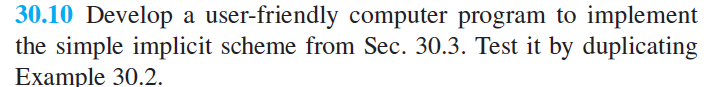

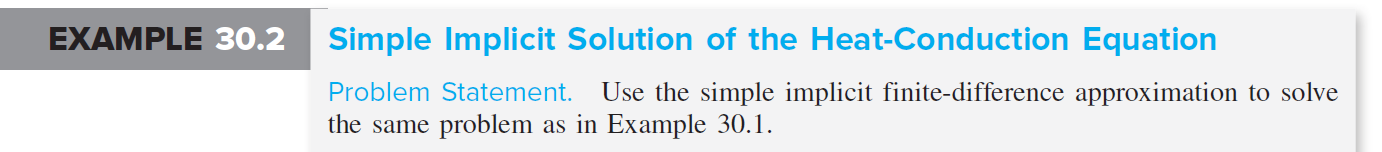

### Answer

1. Define Functions

In [7]:
#reference: section 30.3 in the textbook
def implicit_method():
    """
    This function implements the implicit method (finite difference approximation)
      for the heat-conduction equation.
    """
    
    # get the number of intervals for x
    x_delta = 2
    x_max = 10
    x_cnt = int(x_max / x_delta)
    # get the number of intervals for t
    t_delta = 0.1
    t_max = 12
    t_cnt = int(t_max / t_delta)
    # get other parameters needed
    _lambda = 0.020875
    T_x_min, T_x_max = 100, 50 # boundary conditions
    T_t_0 = 0

    # initialize the matrix of T with value 0, T[t][x]
    T = [[0 for i in range(x_cnt + 1)] for j in range(t_cnt + 1)] # note: do not use * (same reference)
    # set the boundary values
    for row in T:
        row[0] = T_x_min # T(0) = 100
        row[x_cnt] = T_x_max # T(10) = 50

    # calculate the values of time (t+1)
    # NOTE: implicit, based on values in current and previous time, need to solve equations
    # more stable
    a = np.array([[(1+2*_lambda), -_lambda, 0, 0]
                 ,[-_lambda, (1+2*_lambda), -_lambda, 0]
                 ,[0, -_lambda, (1+2*_lambda), -_lambda]
                 ,[0, 0, -_lambda, (1+2*_lambda)]]).astype(float)
    b = np.array([0, 0, 0, 0]).astype(float)

    for t in range(1, t_cnt + 1):
            b[0] = T[t-1][1] + _lambda * T_x_min # boudary
            b[1] = T[t-1][2]
            b[2] = T[t-1][3]
            b[3] = T[t-1][4] + _lambda * T_x_max # boudary

            T_t = np.linalg.solve(a, b)
            T[t][1], T[t][2], T[t][3], T[t][4] = round(T_t[0], 4), round(T_t[1], 4), round(T_t[2], 4), round(T_t[3], 4) 

    return T

2. Problem Solving

In [8]:
result2 = implicit_method()
# show the first five results
result2[:5]

[[100, 0, 0, 0, 0, 50],
 [100, 2.0047, 0.0406, 0.0209, 1.0023, 50],
 [100, 3.9306, 0.119, 0.0618, 1.9653, 50],
 [100, 5.7816, 0.2325, 0.1219, 2.8909, 50],
 [100, 7.5613, 0.3787, 0.2004, 3.781, 50]]

In [9]:
# same as the textbook

3. Plot

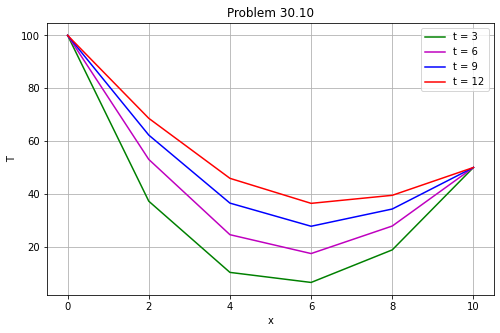

In [10]:
x = np.linspace(0, 10, 6)
t_3 = result2[30]
t_6 = result2[60]
t_9 = result2[90]
t_12 = result2[120]

plt.figure(figsize = (8, 5))
plt.plot(x, t_3, 'g', label='t = 3')
plt.plot(x, t_6, 'm', label='t = 6')
plt.plot(x, t_9, 'b', label='t = 9')
plt.plot(x, t_12, 'r', label='t = 12')
plt.title('Problem 30.10')
plt.xlabel('x')
plt.ylabel('T')
plt.legend(loc='upper right')
plt.grid()